In [1]:
#from pmdarima.arima import auto_arima

#train, test = DataForArima[0:2318], DataForArima[2318:]
#model = auto_arima(train, start_p=1, start_q=1,
                     #test='adf',       # use adftest to find optimal 'd'
#                      max_p=20, max_q=20, # maximum p and q
#                      m=1,              # frequency of series
#                      d=1,           # let model determine 'd'
#                      seasonal=False,   # No Seasonality
#                      start_P=0, 
#                      D=0, 
#                      trace=True,
#                      error_action='ignore',  
#                      suppress_warnings=True, 
#                      stepwise=True)

#print(model.summary())


#from statsmodels.tsa.arima_model import ARIMA
#from sklearn.metrics import mean_squared_error
#train, test = DataForArima[0:2318].values, DataForArima[2318:].values
##history = [x for x in train]
#predictions = list()
#for t in range(len(test)):
#    model = ARIMA(history, order=(8,1,3))
 #   model_fit = model.fit(disp=0,typ='levels',transparams=True,trend='nc')
  #  output = model_fit.forecast()
   # yhat = output[0]
   # predictions.append(yhat)
    #obs = test[t]
    #history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
    #history.append(yhat)
    #print('predicted=%f' % (yhat))
#error = mean_absolute_percentage_error(test, predictions)
#print('Test MAPE: %.3f' % error)
# plot

#matplotlib.rcParams['figure.figsize'] = [10.0,5.0]
#pyplot.plot(test)
#pyplot.plot(predictions, color='red')
#pyplot.show()


#from statsmodels.tsa.arima_model import ARIMA
#from sklearn.metrics import mean_squared_error
#train, test = DataForArima[0:2318].values, DataForArima[2318:].values
#history = [x for x in train]
#predictions = list()
#for t in range(len(test)):
#    model = ARIMA(history, order=(4,1,5))
#    model_fit = model.fit(disp=0,typ='levels',transparams=True,trend='nc')
#    output = model_fit.forecast()
#    yhat = output[0]
#    predictions.append(yhat)
#    obs = test[t]
#    history.append(obs)
#    print('predicted=%f, expected=%f' % (yhat, obs))
    #history.append(yhat)
    #print('predicted=%f' % (yhat))
#error = mean_absolute_percentage_error(test, predictions)
#print('Test MAPE: %.3f' % error)
# plot

#matplotlib.rcParams['figure.figsize'] = [10.0,5.0]
#pyplot.plot(test)
#pyplot.plot(predictions, color='red')
#pyplot.plot(test)
#pyplot.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import matplotlib
import datetime as dt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from keras import optimizers
from matplotlib import pyplot
from keras.layers import Dropout
import tensorflow as tf
# lstm autoencoder recreate sequence
from numpy import array
from pandas.tseries.offsets import *


Using TensorFlow backend.
/Users/garg/anaconda3/envs/Thesis-2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/garg/anaconda3/envs/Thesis-2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/garg/anaconda3/envs/Thesis-2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/garg/anaco

In [2]:
from pmdarima.arima import auto_arima

In [3]:
def DataTillJun_2009():
    jan_to_jun_2009 = pd.read_csv("data/2009/jan_to_jun_2009.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
    jul_to_dec_2009 = pd.read_csv("data/2009/jul_to_dec_2009.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
    jan_to_jun_2010 = pd.read_csv("data/2010/jan_to_aug_2010.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
    jul_to_dec_2010 = pd.read_csv("data/2010/sep_to_dec_2010.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
    jan_to_jun_2011 = pd.read_csv("data/2011/jan_to_jun_2011.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
    jul_to_dec_2011 = pd.read_csv("data/2011/jul_to_dec_2011.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
    jan_to_jun_2012 = pd.read_csv("data/2012/jan_to_jun_2012.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close']) 
    jul_to_dec_2012 = pd.read_csv("data/2012/jul_to_dec_2012.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
    jan_to_jun_2013 = pd.read_csv("data/2013/jan_to_jun_2013.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
    jul_to_dec_2013 = pd.read_csv("data/2013/jul_to_dec_2013.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
    jan_to_jun_2014 = pd.read_csv("data/2014/jan_to_jun_2014.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
    jul_to_dec_2014 = pd.read_csv("data/2014/jul_to_dec_2014.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
    jan_to_jun_2015 = pd.read_csv("data/2015/jan_to_jun_2015.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
    jul_to_dec_2015 = pd.read_csv("data/2015/jul_to_dec_2015.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
    jan_to_jun_2016 = pd.read_csv("data/2016/jan_to_jun_2016.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
    jul_to_dec_2016 = pd.read_csv("data/2016/jul_to_dec_2016.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
    jan_to_jun_2017 = pd.read_csv("data/2017/jan_to_jun_2017.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
    jul_to_dec_2017 = pd.read_csv("data/2017/jul_to_dec_2017.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
    jan_to_jun_2018 = pd.read_csv("data/2018/jan_to_jun_2018.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
    jul_to_dec_2018 = pd.read_csv("data/2018/jul_to_dec_2018.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
    #jan_to_jul_2018 = pd.read_csv("data/2018/jan_to_jun_2018.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
    #sep_to_dec_2018 = pd.read_csv("data/2018/jul_to_dec_2018.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
    jan_to_jun_2019 = pd.read_csv("data/2019/jan_to_jun_2019.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
    jul_to_dec_2019 = pd.read_csv("data/2019/jul_to_dec_2019.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])



#ALL Files are concatenated together 

    df = pd.concat([jan_to_jun_2009,jul_to_dec_2009,jan_to_jun_2010,jul_to_dec_2010,jan_to_jun_2011,jul_to_dec_2011,jan_to_jun_2012,jul_to_dec_2012,jan_to_jun_2013,jul_to_dec_2013,jan_to_jun_2014,jul_to_dec_2014,jan_to_jun_2015,jul_to_dec_2015,jan_to_jun_2016,jul_to_dec_2016,jan_to_jun_2017,jul_to_dec_2017,jan_to_jun_2018,jul_to_dec_2018,jan_to_jun_2019,jul_to_dec_2019])


#Instrument type Equity is selected.

    df = df.loc[df['RFDE_INSTR_TYPE'] == 'REG_DL_INSTR_EQ']

    df =df.reset_index()
#Renaming of the column 

    df = df.rename(columns={'VALUE (in Rs)': 'Sale'})

#Converting the TR_DATE columns which denotes the transaction date into date time formate. 

    df['TR_DATE'] = df['TR_DATE'].astype('datetime64[D]')
    return df


def DataFrameCreation(df):
    
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    df1['Date'] = df['TR_DATE'].values
    df1['Sale'] = df['Sale'].values
    df2['Date'] = df['TR_DATE'].values
    df2['BSE_Close'] = df['BSE_Close'].values
    


#Data is day wise distributed. Thus summing together to get the total sum of Equity instrument sold per day 

    df1 = df1.groupby(['Date']).sum()

    df1 = df1.reset_index(level='Date')

#Getting the exact value of different macro-economic variables per day. 

    df2 = df2.groupby(['Date'], as_index=False).mean()


#Formulating the dataset with columns Date, Sale, and macro-economic variables. 

    df1['BSE_Close'] = df1['Date'].map(df2.set_index('Date')['BSE_Close'])

    test = df1

#For the year 2009 there are 3 dates for which twitter sentiment is missing. They are replaced by the previous values.

    

    TestingFrame = pd.DataFrame(data=test.values,columns=test.columns)
    return TestingFrame

Data = DataTillJun_2009()
TestingFrame = DataFrameCreation(Data)


In [4]:
TestingFrame.isnull().sum()

Date           0
Sale           0
BSE_Close    215
dtype: int64

In [5]:
TestingFrame = TestingFrame.dropna()

del TestingFrame['BSE_Close']
TestingFrame = TestingFrame.reset_index()
del TestingFrame['index']

from scipy import stats
import numpy as np

def Outlier(DataFrame):
    SalesArray = DataFrame['Sale'].values
    SalesArray = SalesArray.astype(float)

    Zscores = stats.zscore(SalesArray)
    z = np.abs(Zscores)

    threshold = 3
    Outliers = np.where(z > 3)

    Outliers = list(Outliers[0])
    return Outliers 

Outliers = Outlier(TestingFrame)
TestingFrame.drop(TestingFrame.index[Outliers],inplace=True)
TestingFrame = TestingFrame.reset_index()
del TestingFrame['index']

TestingFrame.shape




(2686, 2)

In [9]:
TestingFrame.set_index('Date', inplace=True)
DataForArima = TestingFrame['Sale']

In [10]:
TestingFrame.iloc[2665:]

,Sale
Date,
2019-12-02,1.46663e+11
2019-12-03,9.45369e+10
2019-12-04,1.09809e+11
2019-12-05,8.55097e+10
2019-12-06,7.86498e+10
2019-12-09,7.62579e+10
2019-12-10,8.39029e+10
2019-12-11,9.12515e+10
2019-12-12,9.05821e+10


/Users/garg/anaconda3/envs/Thesis-2/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


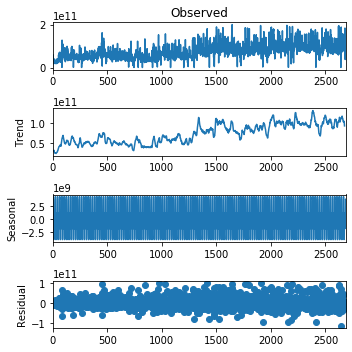

In [11]:
import statsmodels.api as sm
matplotlib.rcParams['figure.figsize'] = [5.0,5.0]
decomposition = sm.tsa.seasonal_decompose(TestingFrame.Sale.values,freq=20,model='additive')
fig = decomposition.plot()

In [12]:
Seasonal = pd.DataFrame()
Seasonal['Values'] = decomposition.seasonal
#Seasonal['residual'] = decomposition.resid

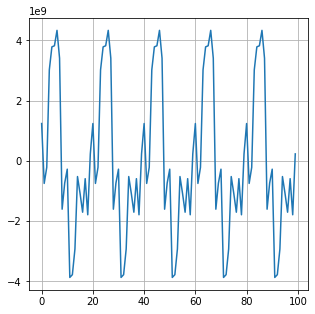

In [13]:
plt.grid()
x = Seasonal['Values'].iloc[:100]
plt.plot(x)
plt.show()

In [14]:
DataForArimaDiff = DataForArima.diff(1)
DataForArimaDiff.dropna(inplace=True)

In [15]:
#DataForArimaDiff = DataForArima.diff(1)
#DataForArimaDiff.dropna(inplace=True)

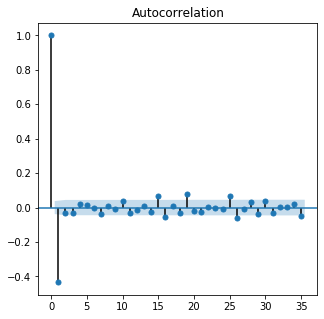

In [16]:

from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(DataForArimaDiff)
pyplot.show()

In [20]:

#from pandas import read_csv
#from matplotlib import pyplot
#from statsmodels.graphics.tsaplots import plot_pacf
#plot_pacf(DataForArimaDiff)
#pyplot.show()

In [17]:
from statsmodels.tsa.stattools import adfuller
def test_for_stationary(input_data):
    r_mean = input_data.rolling(window = 7,center=False).mean()
    r_std = input_data.rolling(window = 7,center=False).std()
    
    # plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'given_series')
    rolling_mean = plt.plot(r_mean, color = 'red', label = 'rolling_mean')
    rolling_std = plt.plot(r_std, color ='green', label = 'rolling_std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


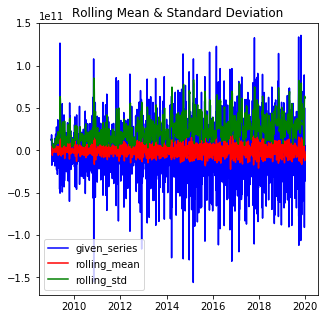

Results of Dickey-Fuller Test:
Test Statistic                -1.467113e+01
p-value                        3.265439e-27
#Lags Used                     2.800000e+01
Number of Observations Used    2.656000e+03
Critical Value (1%)           -3.432814e+00
Critical Value (5%)           -2.862629e+00
Critical Value (10%)          -2.567350e+00
dtype: float64


In [18]:
test_for_stationary(DataForArimaDiff)

In [19]:
DataForArima.shape

(2686,)

In [20]:
from pmdarima.arima import auto_arima

train, test = DataForArima[0:2665], DataForArima[2665:]
model = auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=20, max_q=20, # maximum p and q
                      m=1,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())


Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=134683.049, BIC=134706.599, Time=0.516 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=135786.606, BIC=135798.382, Time=0.073 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=135230.751, BIC=135248.413, Time=0.190 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=134738.164, BIC=134755.827, Time=0.263 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=135784.612, BIC=135790.500, Time=0.050 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=134667.106, BIC=134696.544, Time=0.606 seconds
Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=135026.078, BIC=135049.628, Time=0.183 seconds
Fit ARIMA(3,1,1)x(0,0,0,0) [intercept=True]; AIC=134662.136, BIC=134697.461, Time=1.210 seconds
Fit ARIMA(3,1,0)x(0,0,0,0) [intercept=True]; AIC=134885.538, BIC=134914.976, Time=0.200 seconds
Fit ARIMA(4,1,1)x(0,0,0,0) [intercept=True]; AIC=134645.205, BIC=134686.418, Time=1.651 seco

In [21]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
train, test = DataForArima[0:2665].values, DataForArima[2665:].values
HistoryNew = [x for x in train]
predictions_new = list()
for t in range(len(test)):
    model = ARIMA(HistoryNew, order=(6,1,3))
    model_fit = model.fit(disp=0,typ='levels',transparams=True,trend='nc')
    output = model_fit.forecast()
    yhat = output[0]
    predictions_new.append(yhat)
    obs = test[t]
    HistoryNew.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    



predicted=103603815625.228424, expected=146662954447.980164
predicted=112522106357.007874, expected=94536884505.959946
predicted=109942459873.454941, expected=109809172778.880188
predicted=113753833487.366074, expected=85509707165.489990
predicted=105906388559.173050, expected=78649827653.020172
predicted=94203710876.043442, expected=76257853633.859848
predicted=91345724575.770721, expected=83902860227.319946
predicted=94014363357.795990, expected=91251460068.259872
predicted=97151651337.021454, expected=90582053329.709702
predicted=95157776504.890823, expected=87822591424.879807
predicted=93043797419.987839, expected=95224883981.170334
predicted=97047973328.428696, expected=136164887947.140396
predicted=111389589487.234406, expected=129584024236.789978
predicted=113780790016.146210, expected=94745529792.959869
predicted=104131220522.087112, expected=183747968881.121033
predicted=126610066762.519943, expected=92833929610.220016
predicted=114679685523.210617, expected=37459850987.699959

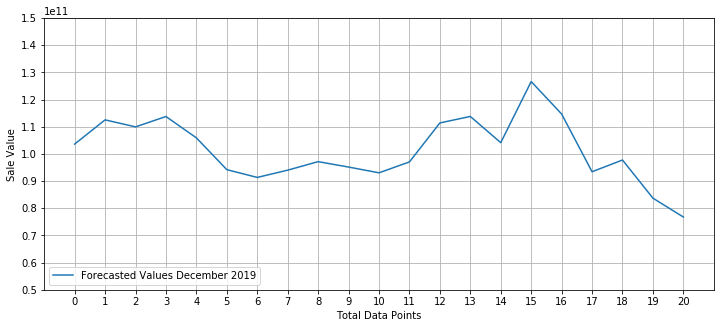

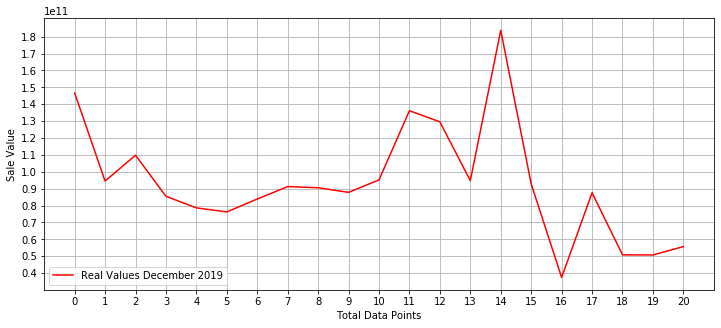

In [24]:
predictions_new = np.asarray(predictions_new)
predictions_new = predictions_new.reshape(-1,1)
test = test.reshape(-1,1)
Forecasted = pd.DataFrame(data=predictions_new)
Real = pd.DataFrame(data=test)

plt.figure(figsize=(12,5))
Forecasted[0].plot(grid = True,label='Forecasted Values December 2019',yticks = [0.5*1e11,0.6*1e11,0.7*1e11,0.8*1e11,0.9*1e11,1.0*1e11,1.1*1e11,1.2*1e11,1.3*1e11,1.4*1e11,1.5*1e11],xticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.xlabel('Total Data Points')
plt.ylabel('Sale Value')
plt.legend(loc=3)

plt.figure(figsize=(12,5))
Real[0].plot(color='red',label='Real Values December 2019',grid = True,yticks = [0.4*1e11,0.5*1e11,0.6*1e11,0.7*1e11,0.8*1e11,0.9*1e11,1.0*1e11,1.1*1e11,1.2*1e11,1.3*1e11,1.4*1e11,1.5*1e11,1.6*1e11,1.7*1e11,1.8*1e11],xticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.xlabel('Total Data Points')
plt.ylabel('Sale Value')
plt.legend(loc=3)


In [25]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print('MAPE: %f' %mean_absolute_percentage_error(test,predictions_new))

MAPE: 34.275506


In [19]:

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
train = DataForArima[:].values
history2 = [x for x in train]
predictions = list()
for t in range(22):
    model = ARIMA(history2, order=(8,1,3))
    model_fit = model.fit(disp=0,typ='levels',transparams=True,trend='nc')
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    print('predicted=%f'% (yhat))
    history2.append(yhat)
    #print('predicted=%f' % (yhat))


predicted=102087411056.451340
predicted=103382323170.570312
predicted=103174683281.642975
predicted=96554550921.006592
predicted=96147509038.418228
predicted=98707477392.922638
predicted=100939480092.996323
predicted=99211992390.110641
predicted=95763587746.649902
predicted=95759491635.173752
predicted=98858334249.333527
predicted=100279004059.566071
predicted=97856218452.254868
predicted=95293395110.760757
predicted=96411138439.074539
predicted=99381685714.101196
predicted=99669828343.793839
predicted=96915858788.399429
predicted=95342093527.017380
predicted=97265027759.888794
predicted=99679108635.571442
predicted=98941704794.529922


#FORECASTING  

In [20]:

#from statsmodels.tsa.arima_model import ARIMA
#from sklearn.metrics import mean_squared_error
#train = DataForArima[:].values
#history2 = [x for x in train]
#predictions = list()
#for t in range(22):
#    model = ARIMA(history2, order=(4,0,3))
#    model_fit = model.fit(disp=0,typ='levels',transparams=True,trend='nc')
#    output = model_fit.forecast()
#    yhat = output[0]
#    predictions.append(yhat)
#    print('predicted=%f'% (yhat))
#    history2.append(yhat)
    #print('predicted=%f' % (yhat))


In [21]:
def DataTillNov2019():
    sep_to_dec_2018 = pd.read_csv("data/2018/sep_to_dec_2018.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
    jan_to_jun_2019 = pd.read_csv("data/2019/jan_to_jun_2019.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
    jul_to_dec_2019 = pd.read_csv("data/2019/jul_to_dec_2019.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
#ALL Files are concatenated together 

    df_2 = pd.concat([sep_to_dec_2018,jan_to_jun_2019,jul_to_dec_2019])


#Instrument type Equity is selected.

    df_2 = df_2.loc[df_2['RFDE_INSTR_TYPE'] == 'REG_DL_INSTR_EQ']

    df_2 =df_2.reset_index()
#Renaming of the column 

    df_2 = df_2.rename(columns={'VALUE (in Rs)': 'Sale'})

#Converting the TR_DATE columns which denotes the transaction date into date time formate. 

    df_2['TR_DATE'] = df_2['TR_DATE'].astype('datetime64[D]')
    return df_2

DataNew = DataTillNov2019()
TestingFrame2 = DataFrameCreation(DataNew)
TestingFrame2 = TestingFrame2.dropna()

del TestingFrame2['BSE_Close']
TestingFrame2 = TestingFrame2.reset_index()
del TestingFrame2['index']
TestingFrame2 = TestingFrame2.reset_index()





In [22]:
def DataAug2018():
    Aug2018Complete = pd.read_csv("Aug-2018.csv",usecols=['date','BSE_Close'])
    Aug2018Complete = Aug2018Complete.dropna()
    Aug2018Complete = Aug2018Complete.rename(columns = {'date':'Date'})
    #Aug2018Complete = Aug2018Complete.reset_index()
    del Aug2018Complete['BSE_Close']
    return Aug2018Complete
#Aug2018Complete

In [23]:
TestingFrame = TestingFrame.reset_index()
TestingFrame = pd.concat([TestingFrame,DataAug2018()],axis=0) 
TestingFrame.shape

(2361, 2)

In [24]:
len(history2)

2361

In [25]:
TestingFrameNew = pd.DataFrame()
TestingFrameNew['Date'] = TestingFrame['Date']
TestingFrameNew['Sale'] = history2
TestingFrameNew = pd.concat([TestingFrameNew,TestingFrame2],axis=0)
TestingFrameNew = TestingFrameNew.reset_index()
del TestingFrameNew['index']
TestingFrameNew.shape


(2685, 3)

In [26]:
Outliers2 = Outlier(TestingFrameNew)
TestingFrameNew.drop(TestingFrameNew.index[Outliers2],inplace=True)
TestingFrameNew.shape

(2671, 3)

In [27]:
TestingFrameNew.set_index('Date', inplace=True)
DataForArimaNew = TestingFrameNew['Sale']


In [28]:
TestingFrameNew = TestingFrameNew.reset_index()

In [29]:
del TestingFrameNew['level_0']

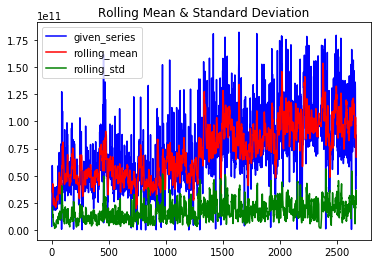

Results of Dickey-Fuller Test:
Test Statistic                   -3.667315
p-value                           0.004597
#Lags Used                       23.000000
Number of Observations Used    2647.000000
Critical Value (1%)              -3.432823
Critical Value (5%)              -2.862633
Critical Value (10%)             -2.567352
dtype: float64


In [43]:
from statsmodels.tsa.stattools import adfuller
def test_for_stationary(input_data):
    r_mean = input_data.rolling(window = 7,center=False).mean()
    r_std = input_data.rolling(window = 7,center=False).std()
    
    # plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'given_series')
    rolling_mean = plt.plot(r_mean, color = 'red', label = 'rolling_mean')
    rolling_std = plt.plot(r_std, color ='green', label = 'rolling_std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_for_stationary(TestingFrameNew['Sale'])

In [56]:
from pmdarima.arima import auto_arima

train, test = DataForArimaNew[0:2650], DataForArimaNew[2650:]
model = auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=20, max_q=20, # maximum p and q
                      m=1,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())


Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=133653.499, BIC=133677.026, Time=0.432 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=134753.489, BIC=134765.253, Time=0.053 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=134207.569, BIC=134225.215, Time=0.111 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=133703.051, BIC=133720.697, Time=0.248 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=134751.496, BIC=134757.378, Time=0.040 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=133641.445, BIC=133670.855, Time=0.597 seconds
Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=133992.071, BIC=134015.599, Time=0.137 seconds
Fit ARIMA(3,1,1)x(0,0,0,0) [intercept=True]; AIC=133634.973, BIC=133670.265, Time=0.804 seconds
Fit ARIMA(3,1,0)x(0,0,0,0) [intercept=True]; AIC=133847.923, BIC=133877.333, Time=0.203 seconds
Fit ARIMA(4,1,1)x(0,0,0,0) [intercept=True]; AIC=133617.361, BIC=133658.535, Time=1.456 seco

In [31]:
DataForArimaNew.iloc[2651:]

Date
2019-12-02    1.46663e+11
2019-12-03    9.45369e+10
2019-12-04    1.09809e+11
2019-12-05    8.55097e+10
2019-12-06    7.86498e+10
2019-12-09    7.62579e+10
2019-12-10    8.39029e+10
2019-12-11    9.12515e+10
2019-12-12    9.05821e+10
2019-12-13    8.78226e+10
2019-12-16    9.52249e+10
2019-12-17    1.36165e+11
2019-12-18    1.29584e+11
2019-12-19    9.47455e+10
2019-12-23    9.28339e+10
2019-12-24    3.74599e+10
2019-12-26    8.75855e+10
2019-12-27     5.0846e+10
2019-12-30    5.07739e+10
2019-12-31    5.57333e+10
Name: Sale, dtype: object

In [30]:
train, test = DataForArimaNew[0:2651].values, DataForArimaNew[2651:].values
HistoryNew = [x for x in train]
predictions_new = list()
for t in range(len(test)):
    model = ARIMA(HistoryNew, order=(2,0,0))
    model_fit = model.fit(disp=0,typ='levels',transparams=True,trend='nc')
    output = model_fit.forecast()
    yhat = output[0]
    predictions_new.append(yhat)
    obs = test[t]
    HistoryNew.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    



predicted=110761109607.525299, expected=146662954447.980164
predicted=127192456754.227753, expected=94536884505.959946
predicted=113007932436.290741, expected=109809172778.880188
predicted=99730737112.573364, expected=85509707165.489990
predicted=92703853682.604034, expected=78649827653.020172
predicted=78817039319.227097, expected=76257853633.859848
predicted=74648660398.327057, expected=83902860227.319946
predicted=77864502818.927536, expected=91251460068.259872
predicted=85091875770.114288, expected=90582053329.709702
predicted=87780545303.003906, expected=87822591424.879807
predicted=85983603364.396912, expected=95224883981.170334
predicted=88915367828.118103, expected=136164887947.140396
predicted=114562631400.493607, expected=129584024236.789978
predicted=127966051108.550812, expected=94745529792.959869
predicted=106000209258.410553, expected=92833929610.220016
predicted=90476213078.904190, expected=37459850987.699959
predicted=59136084894.601608, expected=87585454396.980164
pred

In [ ]:
test

In [27]:
predictions_new = np.asarray(predictions_new)
predictions_new = predictions_new.reshape(-1,1)
test = test.reshape(-1,1)
Forecasted = pd.DataFrame(data=predictions_new)
Real = pd.DataFrame(data=test)

plt.figure(figsize=(12,5))
Forecasted[0].plot(grid = True,label='Forecasted Values December 2019',yticks = [0.5*1e11,0.6*1e11,0.7*1e11,0.8*1e11,0.9*1e11,1.0*1e11,1.1*1e11,1.2*1e11,1.3*1e11,1.4*1e11,1.5*1e11],xticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.xlabel('Total Data Points')
plt.ylabel('Sale Value')
plt.legend(loc=3)

plt.figure(figsize=(12,5))
Real[0].plot(color='red',label='Real Values December 2019',grid = True,yticks = [0.4*1e11,0.5*1e11,0.6*1e11,0.7*1e11,0.8*1e11,0.9*1e11,1.0*1e11,1.1*1e11,1.2*1e11,1.3*1e11,1.4*1e11,1.5*1e11],xticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.xlabel('Total Data Points')
plt.ylabel('Sale Value')
plt.legend(loc=3)


In [28]:
Forecasted = pd.DataFrame(data=predictions_new)
Real = pd.DataFrame(data=test)

In [29]:
test

array([[146662954447.98016],
       [94536884505.95995],
       [109809172778.88019],
       [85509707165.48999],
       [78649827653.02017],
       [76257853633.85985],
       [83902860227.31995],
       [91251460068.25987],
       [90582053329.7097],
       [87822591424.8798],
       [95224883981.17033],
       [136164887947.1404],
       [129584024236.78998],
       [94745529792.95987],
       [92833929610.22002],
       [37459850987.69996],
       [87585454396.98016],
       [50845994414.80978],
       [50773879320.14001],
       [55733342781.96004]], dtype=object)

In [30]:

Forecasted.dtypes


0    float64
dtype: object

In [41]:
Forecasted.to_csv("ForecastedFrameARIMA.csv")

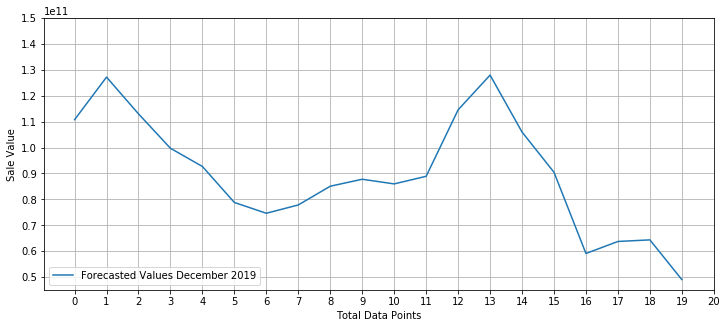

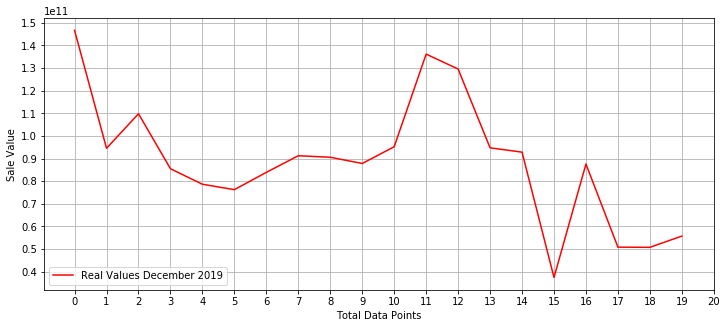

In [32]:
plt.figure(figsize=(12,5))
Forecasted[0].plot(grid = True,label='Forecasted Values December 2019',yticks = [0.5*1e11,0.6*1e11,0.7*1e11,0.8*1e11,0.9*1e11,1.0*1e11,1.1*1e11,1.2*1e11,1.3*1e11,1.4*1e11,1.5*1e11],xticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.xlabel('Total Data Points')
plt.ylabel('Sale Value')
plt.legend(loc=3)

plt.figure(figsize=(12,5))
Real[0].plot(color='red',label='Real Values December 2019',grid = True,yticks = [0.4*1e11,0.5*1e11,0.6*1e11,0.7*1e11,0.8*1e11,0.9*1e11,1.0*1e11,1.1*1e11,1.2*1e11,1.3*1e11,1.4*1e11,1.5*1e11],xticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.xlabel('Total Data Points')
plt.ylabel('Sale Value')
plt.legend(loc=3)


In [33]:
#ARIMA

In [34]:
##Mean Forecast Error (or Forecast Bias)##
forecast_errors = [test[i]-predictions_new[i] for i in range(len(test))]
bias = sum(forecast_errors) * 1.0/len(test)
print('Bias: %f' % bias)

Bias: -1096069394.209457


In [35]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test, predictions_new)
print('MAE: %f' % mae)

MAE: 18166524433.346394


In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(test, predictions_new)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 23349733579.806484


In [37]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print('MAPE: %f' %mean_absolute_percentage_error(test,predictions_new))

In [38]:
print('MAPE: %f' %mean_absolute_percentage_error(test,predictions_new))

MAPE: 23.751983
